#**Дискретное вейвлет преобразование (discrete wavelet transform, DWT)**


**Вейвлет** — математическая функция, позволяющая анализировать различные частотные компоненты данных. График функции выглядит как волнообразные колебания с амплитудой, уменьшающейся до нуля вдали от начала координат. Однако это частное определение — в общем случае анализ сигналов производится в плоскости вейвлет-коэффициентов (масштаб — время — уровень) (Scale-Time-Amplitude). Вейвлет-коэффициенты определяются интегральным преобразованием сигнала.

**Вейвлет-преобразование** — интегральное преобразование, которое представляет собой свертку вейвлет-функции с сигналом. Вейвлет-преобразование переводит сигнал из временного представления в частотно-временное.

Способ преобразования функции (или сигнала) в форму, которая или делает некоторые величины исходного сигнала более поддающимися изучению, или позволяет сжать исходный набор данных. Вейвлетное преобразование сигналов является обобщением спектрального анализа. Вейвлеты — это обобщённое название математических функций определенной формы, которые локальны во времени и по частоте и в которых все функции получаются из одной базовой, изменяя её (сдвигая, растягивая).


В численном и функциональном анализе **дискретные вейвлет-преобразования (ДВП)** относятся к вейвлет-преобразованиям, в которых вейвлеты представлены дискретными сигналами (выборками).

Существует несколько видов реализации алгоритма дискретного вейвлет-преобразования. Самый старый и наиболее известный – алгоритм Малла (пирамидальный). В этом алгоритме два фильтра – сглаживающий и несглаживающий составляются из коэффициентов вейвлета и эти фильтры рекуррентно применяются для получения данных для всех доступных масштабов. Если используется полный набор данных D = 2N и длина сигнала равна L, сначала рассчитываются данные D/2 для масштаба L/2N - 1, затем данные (D/2)/2 для масштаба L/2N - 2, … пока в конце не получится 2 элемента данных для масштаба L/2. Результатом работы этого алгоритма будет массив той же длины, что и входной, где данные обычно сортируются от наиболее крупных масштабов к наиболее мелким.

## Применение DWT

*   **Обработка экспериментальных данных.** Поскольку вейвлеты появились именно как механизм обработки экспериментальных данных, их применение для решения подобных задач представляется весьма привлекательным до сих пор. Вейвлет-преобразование дает наиболее наглядную и информативную картину результатов эксперимента, позволяет очистить исходные данные от шумов и случайных искажений, и даже "на глаз" подметить некоторые особенности данных и направление их дальнейшей обработки и анализа. Кроме того, вейвлеты хорошо подходят для анализа нестационарных сигналов, возникающих в медицине, анализе фондовых рынков и других областях.
*   **Обработка изображений.** Наше зрение устроено так, что мы сосредотачиваем свое внимание на существенных деталях изображения, отсекая ненужное. Используя вейвлет-преобразование, мы можем сгладить или выделить некоторые детали изображения, увеличить или уменьшить его, выделить важные детали и даже повысить его качество!


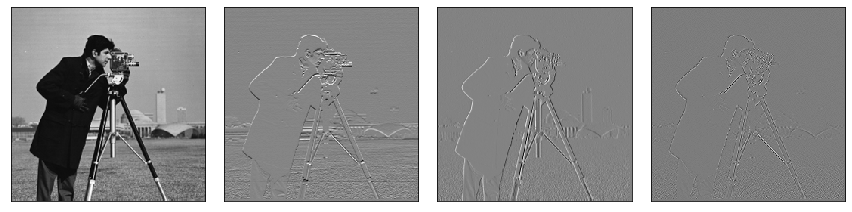

In [10]:
#Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data
# Загрузка изображения
original = pywt.data.camera()
# Применение вейвлет преобразования
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


*   **Сжатие данных.** Особенностью ортогонального многомасштабного анализа является то, что для достаточно гладких данных полученные в результате преобразования детали в основном близки по величине к нулю и, следовательно, очень хорошо сжимаются обычными статистическими методами. Огромным достоинством вейвлет-преобразования является то, что оно не вносит дополнительной избыточности в исходные данные, и сигнал может быть полностью восстановлен с использованием тех же самых фильтров. Кроме того, отделение в результате преобразования деталей от основного сигнала позволяет очень просто реализовать сжатие с потерями – достаточно просто отбросить детали на тех масштабах, где они несущественны! Достаточно сказать, что изображение, обработанное вейвлетами, можно сжать в 3-10 раз без существенных потерь информации (с допустимыми потерями – до 300 раз). В качестве примера отметим, что вейвлет-преобразование положено в основу стандарта сжатия данных MPEG4.

В качестве примера применим DWT для произвольной выборки используя db2 вейвлеты(Вейвлеты Добеши)

In [11]:
import pywt
x = [3, 8, 11, -4, 6, 5, 4, 6]
cA, cD = pywt.dwt(x, 'db2')

Коэффициенты аппроксимации (cA) представляют выход фильтра нижних частот (фильтра усреднения) DWT. Коэффициенты детализации (cD) представляют выход фильтра высоких частот (разностного фильтра) DWT.

In [12]:
print(cA)

[ 6.01040764 11.12423981  2.66434243  7.20047733  7.77817459]


In [13]:
print(cD)

[-3.06186218  8.95215148  2.07735398 -1.44888874  1.22474487]


После чего применим обратное DWT

In [14]:
print(pywt.idwt(cA, cD, 'db2'))

[ 3.  8. 11. -4.  6.  5.  4.  6.]




*   **Нейросети и другие механизмы анализа данных.** Большие трудности при обучении нейросетей (или настройке других механизмов анализа данных) создает сильная зашумленность данных или наличие большого числа "особых случаев" (случайные выбросы, пропуски, нелинейные искажения и т.п.). Такие помехи способны скрывать характерные особенности данных или выдавать себя за них и могут сильно ухудшить результаты обучения. Поэтому рекомендуется очистить данные, прежде чем анализировать их. По уже приведенным выше соображениям, а также благодаря наличию быстрых и эффективных алгоритмов реализации, вейвлеты представляются весьма удобным и перспективным механизмом очистки и предварительной обработки данных для использования их в статистических и бизнес-приложениях, системах искусственного интеллекта и т.п.
*   **Системы передачи данных и цифровой обработки сигналов.** Благодаря высокой эффективности алгоритмов и устойчивости к воздействию помех, вейвлет-преобразование является мощным инструментом в тех областях, где традиционно использовались другие методы анализа данных, например, преобразование Фурье. Возможность применения уже существующих методов обработки результатов преобразования, а также характерные особенности поведения вейвлет-преобразования в частотно-временной области позволяют существенно расширить и дополнить возможности подобных систем.



## Список литературы


1.   https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%B9%D0%B2%D0%BB%D0%B5%D1%82
2.   https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%B9%D0%B2%D0%BB%D0%B5%D1%82-%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5
3.   https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BA%D1%80%D0%B5%D1%82%D0%BD%D0%BE%D0%B5_%D0%B2%D0%B5%D0%B9%D0%B2%D0%BB%D0%B5%D1%82-%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5
4.   https://habr.com/ru/post/449646/
5.   https://habr.com/ru/post/452474/
6.   http://gwyddion.net/documentation/user-guide-ru/wavelet-transform.html
7.   https://habr.com/ru/post/454240/

